In [1]:
__nbid__ = '0028'
__author__ = 'David Nidever <david.nidever@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20240606' # yyymmdd
__datasets__ = ['splus_dr1']
__keywords__ = ['science example', 'plot:cmd', 'plot:color-color', 'image cutout']

# Spectral Energy Distributions with S-PLUS DR1

*David Nidever & the Astro Data Lab Team*

### Table of contents
* [Goals & notebook summary](#goals)
* [Disclaimer & Attribution](#attribution)
* [Imports & setup](#import)
* [Query the data](#query)
* [Color Magnitude Diagrams](#cmd)
* [Color-Color Diagrams](#twocd)
* [Spectral Energy Distributions](#sed)
* [Spatial Density Map](#spatial)
* [Image Cutouts](#cutouts)
* [Resources](#resource)


<a class="anchor" id="goals"></a>
# Goals

We will show some examples of what can be done with the S-PLUS DR1 dataset focusing on the large number of photometric bands and spectral energy distributions.


# Summary

We will create a color magnitude diagram, color-color diagram, spectral energy distribution and image cutouts.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

# Imports and setup

In [2]:
# 3rd party
import numpy as np
from astropy import utils, io
from astropy.visualization import make_lupton_rgb
from pyvo.dal import sia
import pylab as plt
%matplotlib inline

# Data Lab
from dl import queryClient as qc
from dl.helpers.utils import convert

# plots default setup
plt.rcParams['font.size'] = 14

 <a class="anchor" id="query"></a>
# Query the S-PLUS DR1 database

Let's see how we query the S-PLUS DR1 database.  With no specific spatial region in mind we'll just take the first 10,000 objects.

## Construct the query string

In [3]:
# Create the query string; SQL keyword capitalized for clarity
query =\
"""SELECT *
   FROM splus_dr1.stripe82
   LIMIT 10000"""

# Submit the query
Running the query in synchroneous mode is very easy.

In [4]:
response = qc.query(query) # response is by default a CSV-formatted string

We can use a helper function to convert the query result into a data structure. Let's convert to a Pandas dataframe:

In [5]:
R = convert(response,'pandas') # R is a pandas dataframe
print("Number of objects:", R.shape[0])
print(R.head())

Number of objects: 10000
           field                              id        ra         x  \
0  STRIPE82-0107  SPLUS.STRIPE82-0107.00299.griz  315.0033  3159.854   
1  STRIPE82-0107  SPLUS.STRIPE82-0107.00577.griz  315.0088  3124.340   
2  STRIPE82-0107  SPLUS.STRIPE82-0107.00775.griz  315.0110  3109.870   
3  STRIPE82-0107  SPLUS.STRIPE82-0107.01015.griz  315.0050  3148.750   
4  STRIPE82-0107  SPLUS.STRIPE82-0107.01056.griz  315.0201  3050.336   

          y  isoarea  s2ndet  photoflag   fwhm  fwhm_n  ...  prob_star  htm9  \
0  1140.331       13   14.59          0   5.03    2.08  ...        0.0   NaN   
1  1175.678       29   72.21          0   2.40    0.99  ...        1.0   NaN   
2  1198.093       26   58.98          0   2.51    1.04  ...        1.0   NaN   
3  1243.588       51   24.15          0  11.15    4.61  ...        0.0   NaN   
4  1224.520      155  453.79          0   2.41    1.00  ...        1.0   NaN   

   ring256  nest4096  glon  glat  elon  elat  random_id     d

Let's print out the column names

In [6]:
print(np.array(R.columns))

['field' 'id' 'ra' 'x' 'y' 'isoarea' 's2ndet' 'photoflag' 'fwhm' 'fwhm_n'
 'mumax' 'a' 'b' 'theta' 'flraddet' 'krraddet' 'ndet_auto' 'ndet_petro'
 'ndet_aper' 'ujava_auto' 'eujava_auto' 's2n_ujava_auto' 'ujava_petro'
 'eujava_petro' 's2n_ujava_petro' 'ujava_aper' 'eujava_aper'
 's2n_ujava_aper' 'f378_auto' 'ef378_auto' 's2n_f378_auto' 'f378_petro'
 'ef378_petro' 's2n_f378_petro' 'f378_aper' 'ef378_aper' 's2n_f378_aper'
 'f395_auto' 'ef395_auto' 's2n_f395_auto' 'f395_petro' 'ef395_petro'
 's2n_f395_petro' 'f395_aper' 'ef395_aper' 's2n_f395_aper' 'f410_auto'
 'ef410_auto' 's2n_f410_auto' 'f410_petro' 'ef410_petro' 's2n_f410_petro'
 'f410_aper' 'ef410_aper' 's2n_f410_aper' 'f430_auto' 'ef430_auto'
 's2n_f430_auto' 'f430_petro' 'ef430_petro' 's2n_f430_petro' 'f430_aper'
 'ef430_aper' 's2n_f430_aper' 'g_auto' 'eg_auto' 's2n_g_auto' 'g_petro'
 'eg_petro' 's2n_g_petro' 'g_aper' 'eg_aper' 's2n_g_aper' 'f515_auto'
 'ef515_auto' 's2n_f515_auto' 'f515_petro' 'ef515_petro' 's2n_f515_petro'
 'f515_

<a class="anchor" id="cmd"></a>
# Make a Color Magnitude Diagram

Let us look at what a S-PLUS Color Magnitude Diagram (CMD) looks like.
First a scatter plot and then a density map.

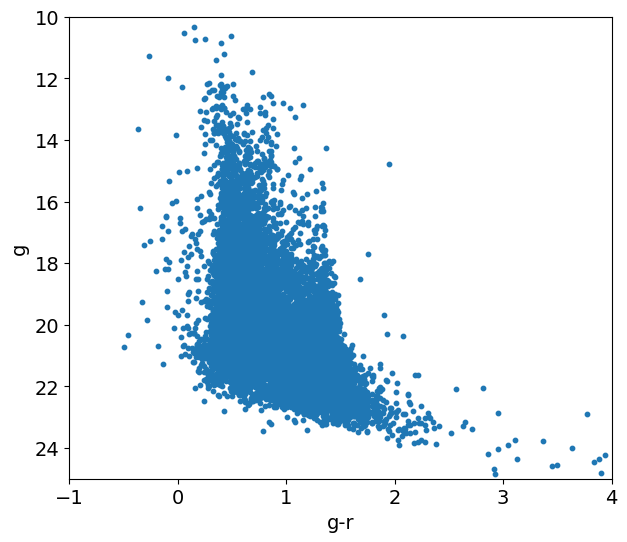

In [7]:
fig = plt.figure(figsize=(7,6))
plt.scatter(R['g_auto']-R['r_auto'], R['g_auto'], s=10)
plt.xlim(-1,4)
plt.ylim(25,10)
plt.xlabel('g-r')
plt.ylabel('g')
plt.show()

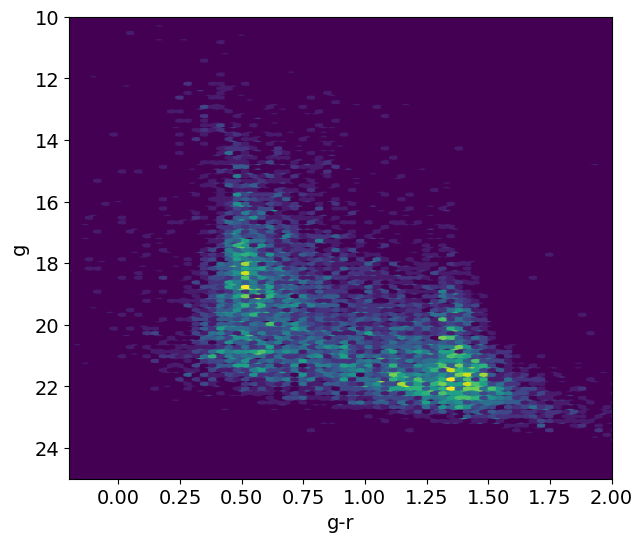

In [8]:
fig = plt.figure(figsize=(7,6))
plt.hexbin(R['g_auto']-R['r_auto'], R['g_auto'], extent=(-1,4,25,10),gridsize=(150,100))
plt.xlim(-0.2,2)
plt.ylim(25,10)
plt.xlabel('g-r')
plt.ylabel('g')
plt.show()

<a class="anchor" id="twocd"></a>
# Make a color-color diagram

The many S-PLUS photometric bands can be used to produce color-color diagrams that are useful for measuring properties such as the metallicity or surface gravity of a star.

(g-F515) vs. (g-r) is sensitive to surface gravity and can be used to separate dwarf stars from giant stars.  The main locus of points is the dwarfs will the red giant live in the upper right.  [See Majewski et al. (2000)](http://adsabs.harvard.edu/abs/2000AJ....120.2550M) for more details on this method.

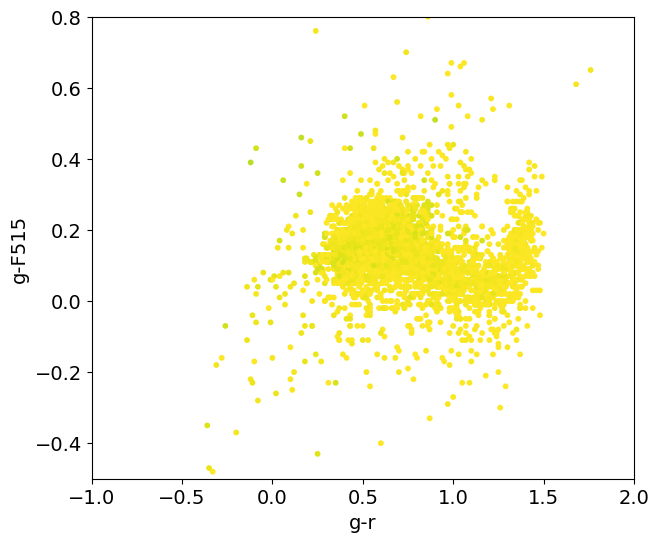

In [9]:
fig = plt.figure(figsize=(7,6))
bright = (R['g_auto']<20)
plt.scatter(R['g_auto'][bright]-R['r_auto'][bright], R['g_auto'][bright]-R['f515_auto'][bright],c=R['g_auto'][bright],s=10)
plt.xlim(-1,2)
plt.ylim(-0.5,0.8)
plt.xlabel('g-r')
plt.ylabel('g-F515')
plt.show()

The (F378-F410) vs. (F515-F861) is a similar color-color plot that can be used to derive surface gravity. See [Cenarro et al. (2018)](http://adsabs.harvard.edu/abs/2018arXiv180402667C) for more details.

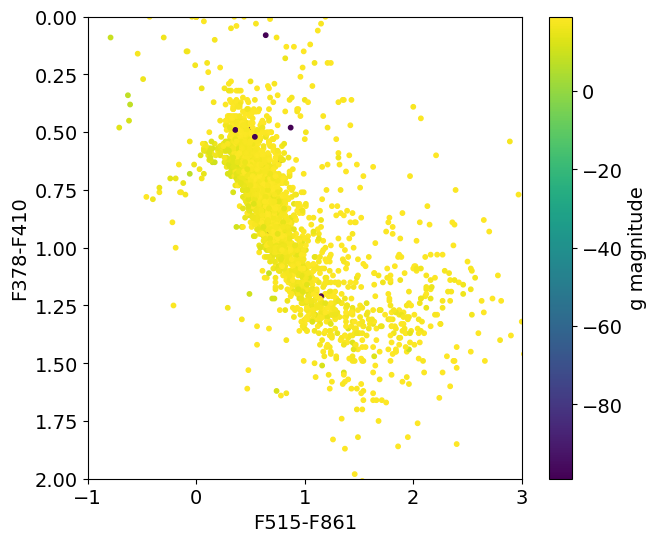

In [10]:
fig = plt.figure(figsize=(7,6))
bright = (R['g_auto']<19)
plt.scatter(R['f515_auto'][bright]-R['f861_auto'][bright], R['f378_auto'][bright]-R['f410_auto'][bright],c=R['g_auto'][bright],s=10)
plt.xlim(-1,3)
plt.ylim(2.0,0.0)
plt.xlabel('F515-F861')
plt.ylabel('F378-F410')
cbar = plt.colorbar()
cbar.set_label('g magnitude')

<a class="anchor" id="sed"></a>
# Creating Spectral Energy Distributions
One of the great advantages of the S-PLUS dataset is the large number of wide and narrow-band filters that can be used
to study the properties of the objects.  Here we show how plot the Spectral Energy Distributions (SEDs) of objects.  These can then be compared to spectral models to constrain properties such as Teff, logg and metallicity (for stars) and galaxy type and redshift for galaxies (see [Cennaro et al. 2018](http://adsabs.harvard.edu/abs/2018arXiv180402667C) for some examples).

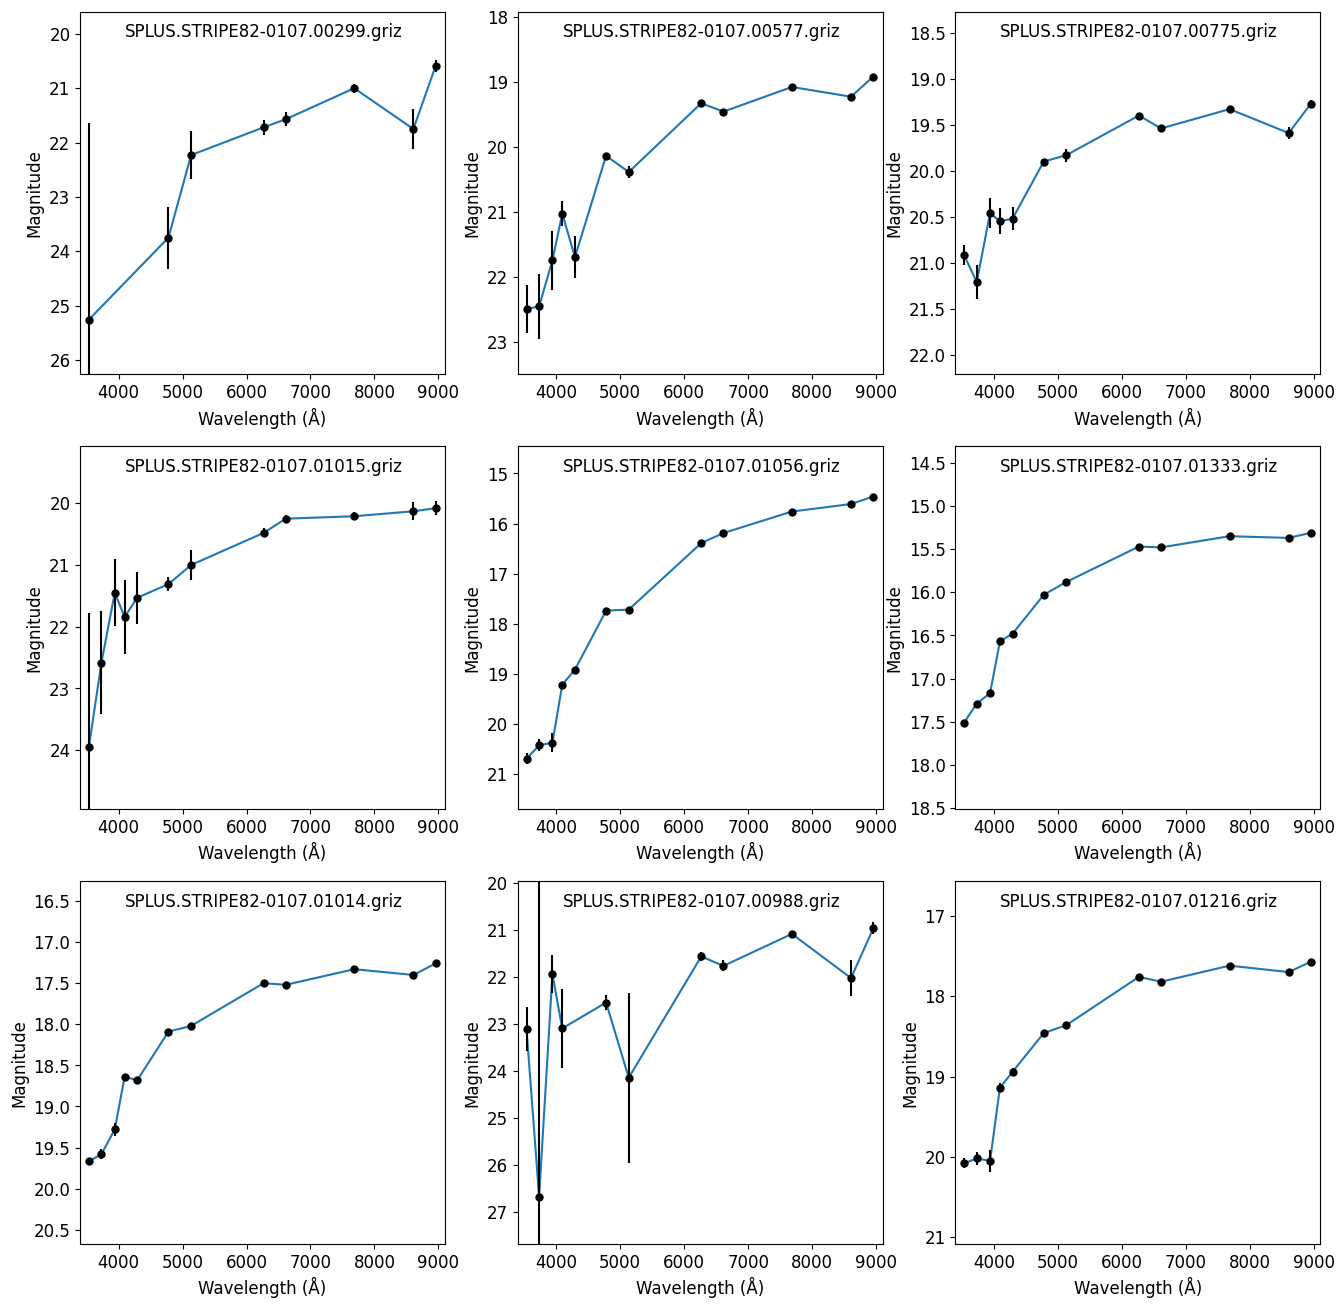

In [11]:
fig = plt.figure(figsize=(16,16))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font',**font)
bands = ['ujava','f378','f395','f410','f430','g','f515','r','f660','i','f861','z']
wave = np.array([3536.,3733.,3941.,4095.,4293.,4780.,5134.,6267.,6614.,7684.,8608.,8956.])
for j in range(9):
    ax = fig.add_subplot(3,3,j+1)
    mag = []
    err = []
    for b in bands:
        mag.append(R[b+'_auto'][j])
        err.append(R['s2n_'+b+'_auto'][j])
    mag = np.array(mag)
    err = 1.087/np.array(err)
    gd = (mag < 50)
    ax.plot(wave[gd],mag[gd])
    #ax.scatter(wave[gd],mag[gd])
    #ax.errorbar(wave[gd],mag[gd],yerr=err[gd], fmt='o', color='black',
    #         ecolor='lightgray', elinewidth=3, capsize=0);
    ax.errorbar(wave[gd],mag[gd],yerr=err[gd], fmt='.k',markersize=10)
    ax.set_xlim(3400,9100)
    ax.set_ylim(np.max(mag[gd])+1.0,np.min(mag[gd])-1.0)
    ax.set_xlabel('Wavelength (Å)')
    ax.set_ylabel('Magnitude')
    ax.text(4100.0,np.min(mag[gd])-1.0+0.07*(np.max(mag[gd])-np.min(mag[gd])+2.0),R['id'][j]) 

<a class="anchor" id="spatial"></a>
# Make a figure of the spatial distribution

Let's make a spatial density map of the sources.

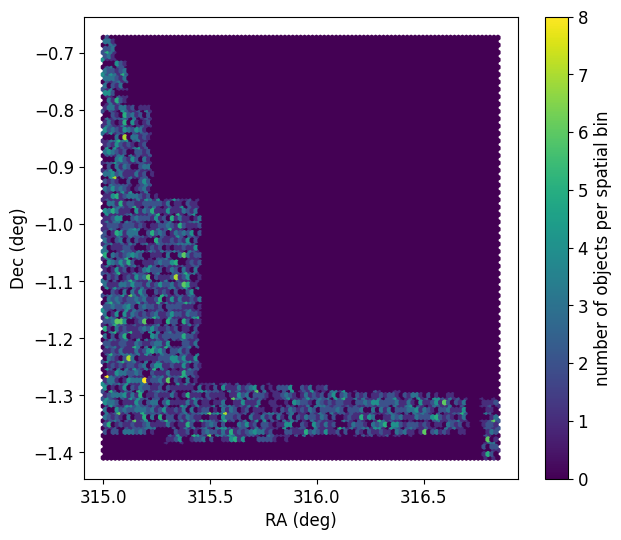

In [12]:
fig = plt.figure(figsize=(7,6))
plt.hexbin(R['ra'][0:5000], R['dec'][0:5000],gridsize=100)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.colorbar(label='number of objects per spatial bin');

<a class="anchor" id="cuouts"></a>
# Image Cutouts

Let's get some image cutouts and make a three-color image.

First we define a few helper functions.

In [13]:
# set up SIA
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/splus_dr1"
svc = sia.SIAService(DEF_ACCESS_URL)

# a little func to download the deepest stacked images
def download_deepest_images(ra,dec,fov=0.1,bands=list('GRI')):
    imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
    print("The full image list contains {:d} entries.".format(len(imgTable)))
    sel0 = (imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image') # basic selection
    images = []
    for band in bands:
        print("Band {:s}: ".format(band)) #, end='')
        sel = sel0 & (imgTable['obs_bandpass'] == band) # add 'band' to selection
        Table = imgTable[sel] # select
        row = Table[np.argmax(Table['exptime'].data.data.astype('float'))] # pick image with longest exposure time
        url = row['access_url'] # get the download URL
        print('downloading deepest stacked image...')
        img = io.fits.getdata(utils.data.download_file(url,cache=True,show_progress=False,timeout=120)) # .decode() b/c in Python 3 url is of "byte" type and getdata() expects "string" type
        images.append(img)
        
    print("Downloaded {:d} images.".format(len(images)))
    return images

# multi panel image plotter
def plot_images(images,geo=None,panelsize=7,titles=list('gri'),cmap=plt.cm.gray_r):
    if geo is None:
        geo = (2,2)
        
    fig = plt.figure(figsize=(geo[0]*panelsize,geo[1]*panelsize))
    for j,img in enumerate(images):
        ax = fig.add_subplot(geo[1],geo[0],j+1)
        ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,norm=plt.mpl.colors.PowerNorm(0.1))
        ax.set_title('{:s}'.format(titles[j]))
        plt.axis('off')

Now we download the deepest stacked images in three bands and combine them to make a 3-band color image.

In [14]:
bands = ['F515','R','I']
idx = 1
ra = 315.15
dec = -0.8
images = download_deepest_images(ra,dec, fov=0.1, bands=bands) # FOV in deg

The full image list contains 25 entries.
Band F515: 
downloading deepest stacked image...
Band R: 
downloading deepest stacked image...
Band I: 
downloading deepest stacked image...
Downloaded 3 images.


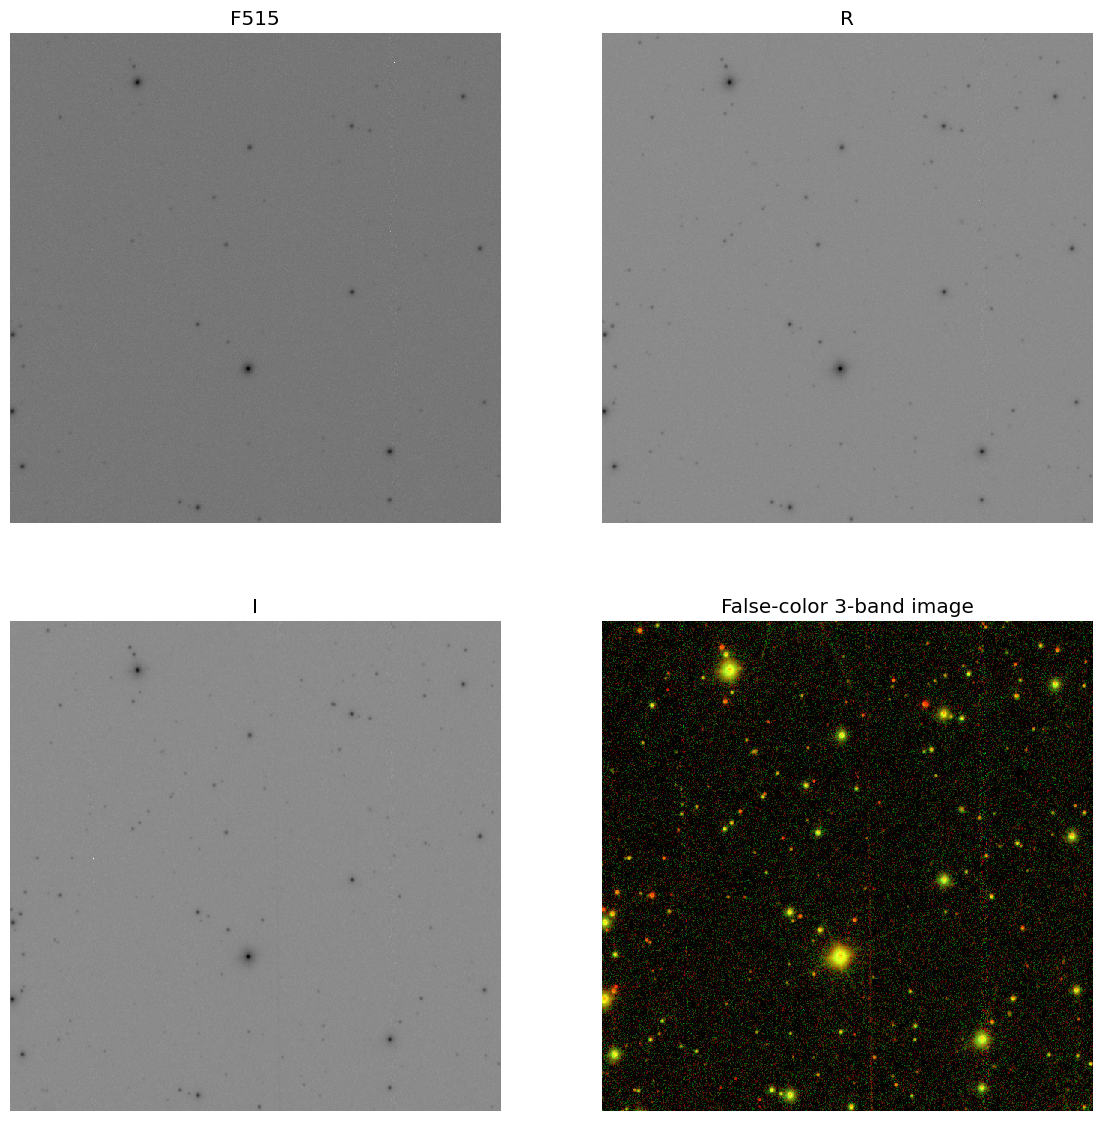

In [15]:
images2 = [im-np.median(im) for im in images] # subtract median from all images for better scaling
images2 += [make_lupton_rgb(*images2[::-1],stretch=0.5)] # add a 3-color composite image
plot_images(images2,titles=bands+['False-color 3-band image'])

# Some resources

Cenarro et al. (2018) "J-PLUS: The Javalambre Photometric Local Universe Survey":
http://adsabs.harvard.edu/abs/2018arXiv180402667C

Majewski et al. (2000) "Exploring Halo Substructure with Giant Stars. I. Survey Description and Calibration of the Photometric Search Technique": http://adsabs.harvard.edu/abs/2017AJ....154..199N
